In [198]:
%matplotlib nbagg
import pandas as pd

In [199]:
data = pd.read_csv("./data.csv")

In [200]:
data

,출전,약재명,방제목록
0,사상,보중익기탕,"인삼, 황기, 감초, 백출, 당귀, 진피, 곽향, 자소엽, 생강, 대추"
1,방약합편,보중익기탕,"황기, 인삼, 백출, 감초, 일당귀, 진피, 승마, 시호"
2,동의보감,보중익기탕,"황기, 인삼, 백출, 진피, 일당귀, 감초, 승마, 시호, 황백, 홍화"


In [201]:
raw_data = data.copy()

In [202]:
#
raw_data = raw_data.set_index(['출전'])
raw_data

,약재명,방제목록
출전,,
사상,보중익기탕,"인삼, 황기, 감초, 백출, 당귀, 진피, 곽향, 자소엽, 생강, 대추"
방약합편,보중익기탕,"황기, 인삼, 백출, 감초, 일당귀, 진피, 승마, 시호"
동의보감,보중익기탕,"황기, 인삼, 백출, 진피, 일당귀, 감초, 승마, 시호, 황백, 홍화"


In [203]:
raw_data['방제목록']=raw_data['방제목록'].str.replace(' ', '')

In [204]:
raw_data['방제목록'].str.get_dummies(sep=',')

,감초,곽향,당귀,대추,백출,생강,승마,시호,인삼,일당귀,자소엽,진피,홍화,황기,황백
출전,,,,,,,,,,,,,,,
사상,1,1,1,1,1,1,0,0,1,0,1,1,0,1,0
방약합편,1,0,0,0,1,0,1,1,1,1,0,1,0,1,0
동의보감,1,0,0,0,1,0,1,1,1,1,0,1,1,1,1


In [205]:
raw_tokens = raw_data['방제목록'].str.get_dummies(sep=',')
print(raw_tokens.columns)
# 이미 겟더미로 가른 뒤에,, 칼럼명의 공백을 없애봤자..  같은'인삼'이 안합쳐진다... => 앞에서 str.replace로 내부오타로 생각하여 제거!!
raw_tokens.columns = raw_tokens.columns.str.strip()
raw_tokens.columns

Index(['감초', '곽향', '당귀', '대추', '백출', '생강', '승마', '시호', '인삼', '일당귀', '자소엽',
       '진피', '홍화', '황기', '황백'],
      dtype='object')


Index(['감초', '곽향', '당귀', '대추', '백출', '생강', '승마', '시호', '인삼', '일당귀', '자소엽',
       '진피', '홍화', '황기', '황백'],
      dtype='object')

In [206]:
raw_tokens.sum(axis=0)

감초     3
곽향     1
당귀     1
대추     1
백출     3
생강     1
승마     2
시호     2
인삼     3
일당귀    2
자소엽    1
진피     3
홍화     1
황기     3
황백     1
dtype: int64

In [207]:
token_counts = raw_tokens.sum(axis=0)

In [208]:
token_counts[ token_counts >=2 ]

감초     3
백출     3
승마     2
시호     2
인삼     3
일당귀    2
진피     3
황기     3
dtype: int64

In [209]:
token_real = token_counts[ token_counts >=2 ]
##
token_only = token_counts[ token_counts <2 ]

In [210]:
##
token_only

곽향     1
당귀     1
대추     1
생강     1
자소엽    1
홍화     1
황백     1
dtype: int64

In [211]:
columns = token_real.index
##
columns_only = token_only.index

In [212]:
duplicated_tokens = raw_tokens[columns]
##
only_tokens = raw_tokens[columns_only]

In [213]:
duplicated_tokens.head()

,감초,백출,승마,시호,인삼,일당귀,진피,황기
출전,,,,,,,,
사상,1,1,0,0,1,0,1,1
방약합편,1,1,1,1,1,1,1,1
동의보감,1,1,1,1,1,1,1,1


In [214]:
##
only_tokens.head()

,곽향,당귀,대추,생강,자소엽,홍화,황백
출전,,,,,,,
사상,1,1,1,1,1,0,0
방약합편,0,0,0,0,0,0,0
동의보감,0,0,0,0,0,1,1


In [215]:
duplicated_tokens.sum(axis=0)

감초     3
백출     3
승마     2
시호     2
인삼     3
일당귀    2
진피     3
황기     3
dtype: int64

In [216]:
duplicated_tokens.sum(axis=0).sort_values(ascending=False)

황기     3
진피     3
인삼     3
백출     3
감초     3
일당귀    2
시호     2
승마     2
dtype: int64

In [217]:
columns = duplicated_tokens.sum(axis=0).sort_values(ascending=False).index

In [218]:
duplicated_tokens.sum(axis=1)

출전
사상      5
방약합편    8
동의보감    8
dtype: int64

In [219]:
duplicated_tokens.sum(axis=1).sort_values(ascending=False)

출전
동의보감    8
방약합편    8
사상      5
dtype: int64

In [220]:
index = duplicated_tokens.sum(axis=1).sort_values(ascending=False).index

In [221]:
descending_tokens = duplicated_tokens.loc[index, columns]

In [222]:
print(descending_tokens.shape)
print(descending_tokens.columns)
descending_tokens.head()

(3, 8)
Index(['황기', '진피', '인삼', '백출', '감초', '일당귀', '시호', '승마'], dtype='object')


,황기,진피,인삼,백출,감초,일당귀,시호,승마
출전,,,,,,,,
동의보감,1,1,1,1,1,1,1,1
방약합편,1,1,1,1,1,1,1,1
사상,1,1,1,1,1,0,0,0


In [223]:
#
axis0_sum=descending_tokens.sum(axis=0)
axis0_sum.name = '중복출전 수'
d_tokens_with_sum = descending_tokens.append(axis0_sum)

axis1_sum=descending_tokens.sum(axis=1)
d_tokens_with_sum['중복약재 총합'] = axis1_sum

d_tokens_with_sum

,황기,진피,인삼,백출,감초,일당귀,시호,승마,중복약재 총합
출전,,,,,,,,,
동의보감,1,1,1,1,1,1,1,1,8.0
방약합편,1,1,1,1,1,1,1,1,8.0
사상,1,1,1,1,1,0,0,0,5.0
중복출전 수,3,3,3,3,3,2,2,2,NaN


In [226]:
##
only_tokens['단독약재 총합']=only_tokens.sum(axis=1)
only_tokens

C:\Users\is2js\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,곽향,당귀,대추,생강,자소엽,홍화,황백,단독약재 총합
출전,,,,,,,,
사상,1,1,1,1,1,0,0,5
방약합편,0,0,0,0,0,0,0,0
동의보감,0,0,0,0,0,1,1,2


<IPython.core.display.Javascript object>


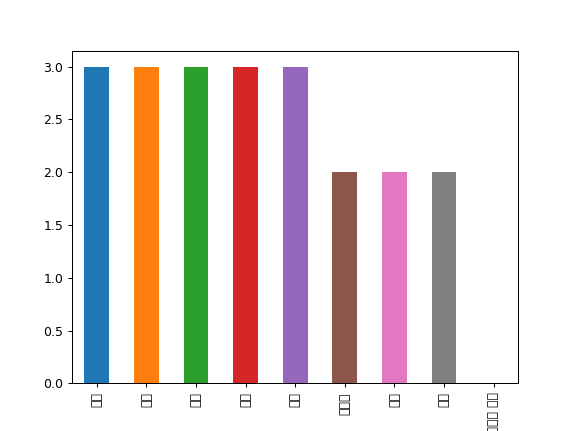

In [224]:
#
d_tokens_with_sum.loc['중복출전 수', :].plot(kind='bar')

<IPython.core.display.Javascript object>


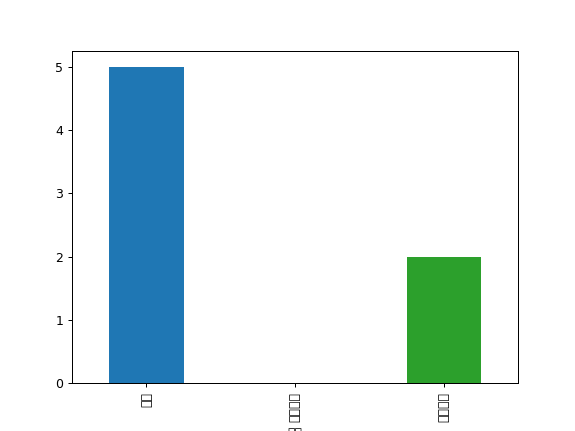

In [228]:
##
only_tokens['단독약재 총합'].plot(kind='bar')

In [229]:
new_data = pd.concat( [raw_data, d_tokens_with_sum ], axis=1 )
new_data.head()

C:\Users\is2js\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  """Entry point for launching an IPython kernel.


,약재명,방제목록,황기,진피,인삼,백출,감초,일당귀,시호,승마,중복약재 총합
동의보감,보중익기탕,"황기,인삼,백출,진피,일당귀,감초,승마,시호,황백,홍화",1,1,1,1,1,1,1,1,8.0
방약합편,보중익기탕,"황기,인삼,백출,감초,일당귀,진피,승마,시호",1,1,1,1,1,1,1,1,8.0
사상,보중익기탕,"인삼,황기,감초,백출,당귀,진피,곽향,자소엽,생강,대추",1,1,1,1,1,0,0,0,5.0
중복출전 수,NaN,NaN,3,3,3,3,3,2,2,2,NaN


In [230]:
##
new_data_with_only = pd.concat( [new_data, only_tokens ], axis=1 )
new_data_with_only.head()

C:\Users\is2js\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  


,약재명,방제목록,황기,진피,인삼,백출,감초,일당귀,시호,승마,중복약재 총합,곽향,당귀,대추,생강,자소엽,홍화,황백,단독약재 총합
동의보감,보중익기탕,"황기,인삼,백출,진피,일당귀,감초,승마,시호,황백,홍화",1,1,1,1,1,1,1,1,8.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,2.0
방약합편,보중익기탕,"황기,인삼,백출,감초,일당귀,진피,승마,시호",1,1,1,1,1,1,1,1,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
사상,보중익기탕,"인삼,황기,감초,백출,당귀,진피,곽향,자소엽,생강,대추",1,1,1,1,1,0,0,0,5.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,5.0
중복출전 수,NaN,NaN,3,3,3,3,3,2,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
